In [1]:
#At first, we import python libraries that we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import tkinter as tk
from tkinter import messagebox


In [2]:
train_df = pd.read_csv("car_prices/train.csv")
test_df = pd.read_csv("car_prices/test.csv")

train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
test_df.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [4]:
train_df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [5]:
train_df=train_df.replace('-',0)
test_df=test_df.replace('-',0)

In [6]:
train_df['Price'].unique()

array([13328, 16621,  8467, ..., 56814, 63886, 22075], dtype=int64)

In [7]:
# Data Completence

# Check for missing values
missing_values = train_df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(train_df)) * 100

# Print the missing values count and percentage for each column
print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values Percentage:
ID                  0.0
Price               0.0
Levy                0.0
Manufacturer        0.0
Model               0.0
Prod. year          0.0
Category            0.0
Leather interior    0.0
Fuel type           0.0
Engine volume       0.0
Mileage             0.0
Cylinders           0.0
Gear box type       0.0
Drive wheels        0.0
Doors               0.0
Wheel               0.0
Color               0.0
Airbags             0.0
dtype: float64


In [8]:
# Data Completence

# Check for missing values
missing_values = test_df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(test_df)) * 100

# Print the missing values count and percentage for each column
print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values Percentage:
ID                    0.0
Levy                  0.0
Manufacturer          0.0
Model                 0.0
Prod. year            0.0
Category              0.0
Leather interior      0.0
Fuel type             0.0
Engine volume         0.0
Mileage               0.0
Cylinders             0.0
Gear box type         0.0
Drive wheels          0.0
Doors                 0.0
Wheel                 0.0
Color                 0.0
Airbags               0.0
Price               100.0
dtype: float64


In [9]:
# Choose important features     

drop = ['Manufacturer', 'Model','Wheel', 'Color']

train_filtered= train_df.drop(columns=drop)

test_filtered= test_df

In [10]:
train_filtered['Prod. year'].unique()

array([2010, 2011, 2006, 2014, 2016, 2013, 2007, 1999, 1997, 2018, 2008,
       2012, 2017, 2001, 1995, 2009, 2000, 2019, 2015, 2004, 1998, 1990,
       2005, 2003, 1985, 1996, 2002, 1993, 1992, 1988, 1977, 1989, 1994,
       2020, 1984, 1986, 1991, 1983, 1953, 1964, 1974, 1987, 1943, 1978,
       1965, 1976, 1957, 1980, 1939, 1968, 1947, 1982, 1981, 1973],
      dtype=int64)

In [11]:
train_filtered=train_filtered.replace('04-May',4)
train_filtered=train_filtered.replace('02-Mar',2)
train_filtered=train_filtered.replace('>5',7)
train_filtered['Mileage']=train_filtered['Mileage'].str.rstrip('km').astype(int)
train_filtered['Levy']=train_filtered['Levy'].astype(int)

# Test data clean 
test_filtered=test_filtered.replace('04-May',4)
test_filtered=test_filtered.replace('02-Mar',2)
test_filtered=test_filtered.replace('>5',7)
test_filtered['Mileage']=test_filtered['Mileage'].str.rstrip('km').astype(int)
test_filtered['Levy']=test_filtered['Levy'].astype(int)
test_filtered['Mileage'].unique()

array([     0,  26000, 168000, ...,  81109, 146697, 148633])

In [12]:
# Identify categorical columns by checking their data types
categorical_columns = train_filtered.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Drive wheels']


In [13]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=categorical_columns)


train_filtered = encoder.fit_transform(train_filtered)

test_filtered = encoder.fit_transform(test_filtered)


Positive Correlations:
                        ID     Price      Levy  Prod. year  Category  \
ID                1.000000       NaN  0.102614    0.071352       NaN   
Price                  NaN  1.000000       NaN    0.012982  0.005907   
Levy              0.102614       NaN  1.000000    0.364712       NaN   
Prod. year        0.071352  0.012982  0.364712    1.000000       NaN   
Category               NaN  0.005907       NaN         NaN  1.000000   
Leather interior       NaN       NaN       NaN         NaN  0.123710   
Fuel type         0.049642  0.012167       NaN         NaN  0.094515   
Engine volume          NaN  0.020192       NaN         NaN  0.034734   
Mileage           0.004157       NaN       NaN         NaN       NaN   
Cylinders              NaN  0.007518  0.250950         NaN       NaN   
Gear box type          NaN  0.016723       NaN         NaN  0.194988   
Drive wheels           NaN       NaN       NaN         NaN  0.341010   
Doors             0.017195       NaN  0.0

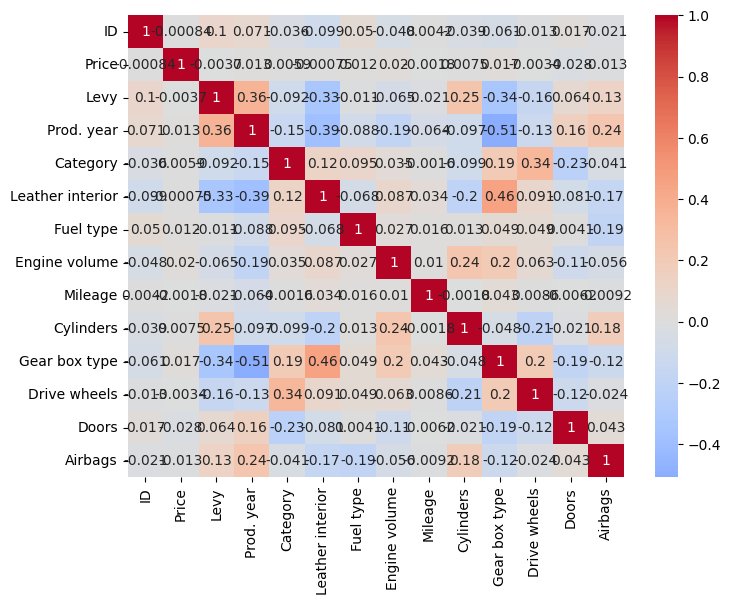

In [14]:
import seaborn as sns
# Heatmap is very effecient in finding collerations between features

# Calculate the correlation matrix
correlation_matrix = train_filtered.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', center=0)

# Filter out only the positively correlated values
positive_correlations = correlation_matrix[correlation_matrix > 0]

# Output the positive correlations
print("Positive Correlations:")
print(positive_correlations)

plt.show()

## As seen the colleration between features and prices are very week, hence it's very hard to get good prediction results from this dataset

In [15]:
# Step 3: Select features with positive correlation with the price
target_variable = 'Price'  # Replace 'price' with the name of your target variable column
positive_correlations = correlation_matrix[target_variable].drop(target_variable)
positively_correlated_features = positive_correlations[positive_correlations > 0].index.tolist()

# Step 4: Use the selected features in your machine learning prediction
X = train_filtered[positively_correlated_features]
y = train_filtered[target_variable]

# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Now, X contains the features positively correlated with the price,
# and y contains the target variable 'price' for machine learning modeling.

# Print the positively correlated features
print("Positively Correlated Features with 'price':")
print(positively_correlated_features)

Positively Correlated Features with 'price':
['Prod. year', 'Category', 'Fuel type', 'Engine volume', 'Cylinders', 'Gear box type']


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Step 5: Create and train the decision tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [18]:
# Step 6: Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 149595651.37715235
R-squared (R2): 0.5293622119710876


## Neural network approach

In [19]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
# Step 5: Standardize the input features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Create the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression task (1 neuron for price prediction)

# Step 7: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# # Step 8: Train the model
# history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# # Step 9: Make predictions on the test set
# y_pred = model.predict(X_test_scaled).flatten()

# # Step 10: Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)